In [1]:
%run ./'01 load.ipynb'

Last data for germany: 2020-04-04 18:52:06


In [2]:
country = 'Germany'
start = '2020-02-25'
df = df[df['country'] == country]

In [3]:
len_predict = 10
len_total = len(df['date'])
len_base = len(df[df['date'] >= start])

In [4]:
dates_new = pd.date_range(df['date'].iloc[-1], periods=len_predict)
df_new = pd.DataFrame(dates_new[1:], columns=['date'])
df = df.append(df_new, ignore_index=True)
df['date_string'] = df['date'].dt.strftime('%d. %b')

In [5]:
x = list(range(len_base))
y = df[df['date'] >= start]['confirmed'][:len_base]

In [6]:
from scipy.optimize import curve_fit
from numpy import exp
def func(x, a1, a2, a3):
    s = (83*10**6)*0.7 # 70% der deutschen Bevölkerung
    e = exp(1)
    return s / (( 1 + ((a1*(e**(a2*x)))/(a3))))
popt, pcov = curve_fit(func, x, y)
print(*popt)
print(*pcov)
# get x values from predictor
predict = []
for i in range(len_base + len_predict-1):
    prediction = func(i, *popt)
    prediction = 0 if prediction < 0 else round(prediction, -2)
    predict.append(prediction)
df['predict1'] = [0] * (len_total-len_base) + predict

71.51688360139083 -0.11116232815851448 0.001704991048975441
[-2.34022696e+16  2.10000970e+05 -5.57859442e+11] [2.10000966e+05 1.93566381e-05 5.00596965e+00] [-5.57859442e+11  5.00596974e+00 -1.32981614e+07]


In [7]:
from scipy.optimize import curve_fit
from numpy import exp
def func(x, a1, a2, a3):
    e = exp(1)
    return (a1*a2**x)+a3
popt, pcov = curve_fit(func, x, y)
print(*popt)
print(*pcov)
# get x values from predictor
predict = []
for i in range(len_base + len_predict-1):
    prediction = func(i, *popt)
    prediction = 0 if prediction < 0 else round(prediction, -2)
    predict.append(prediction)
df['predict2'] = [0] * (len_total-len_base) + predict

3097.1988109605213 1.095755354673718 -7185.895289976402
[ 3.67223070e+05 -3.31137486e+00 -8.88156677e+05] [-3.31137486e+00  3.01704905e-05  7.75231055e+00] [-8.88156677e+05  7.75231055e+00  2.69988781e+06]


In [8]:
from scipy.optimize import curve_fit
from numpy import exp
def func(x, a1, a2, a3):
    e = exp(1)
    return (a1**(a3*x))+a2
popt, pcov = curve_fit(func, x, y)
print(*popt)
print(*pcov)
# get x values from predictor
predict = []
for i in range(len_base + len_predict-1):
    prediction = func(i, *popt)
    prediction = 0 if prediction < 0 else round(prediction, -2)
    predict.append(prediction)
df['predict3'] = [0] * (len_total-len_base) + predict

1.1579190369350647 12375.114217975724 2.0352597795572516
[ 5.78267569e+09  9.60994422e+07 -6.92775298e+10] [ 9.60994421e+07  9.59201063e+06 -1.15128920e+09] [-6.92775298e+10 -1.15128920e+09  8.29957685e+11]


In [9]:
df.tail(len_predict+5)

,date,date_string,country,confirmed,active,deaths,recovered,predict1,predict2,predict3
68,2020-03-30 23:59:59,30. Mar,Germany,"66,885",0,645,0,"60,600","62,200","37,900"
69,2020-03-31 23:59:59,31. Mar,Germany,"71,808",0,775,0,"67,700","68,800","46,700"
70,2020-04-01 23:59:59,01. Apr,Germany,"77,872",0,920,0,"75,700","76,100","58,700"
71,2020-04-02 23:59:59,02. Apr,Germany,"84,794",0,"1,107",0,"84,500","84,100","74,800"
72,2020-04-03 23:59:59,03. Apr,Germany,"91,159",0,"1,275",0,"94,500","92,800","96,500"
73,2020-04-04 18:52:06,04. Apr,Germany,"92,150","64,420","1,330","26,400","105,600","102,400","125,700"
74,2020-04-05 18:52:06,05. Apr,NaN,nan,nan,nan,nan,"117,900","112,900","165,200"
75,2020-04-06 18:52:06,06. Apr,NaN,nan,nan,nan,nan,"131,800","124,400","218,300"
76,2020-04-07 18:52:06,07. Apr,NaN,nan,nan,nan,nan,"147,200","137,000","289,900"
77,2020-04-08 18:52:06,08. Apr,NaN,nan,nan,nan,nan,"164,500","150,800","386,400"


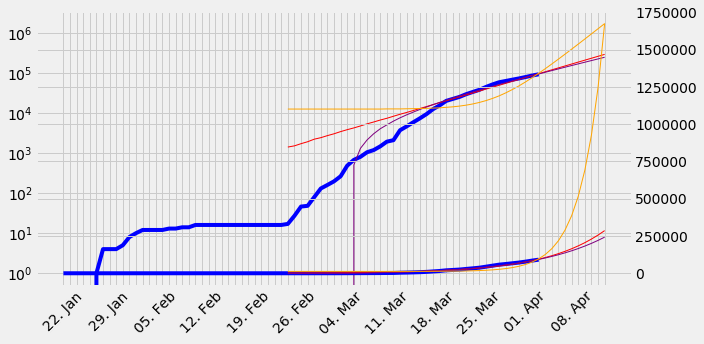

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,1,1)
ax1.grid(True)
ax1.set_yscale('log')
ax1.plot(df['date_string'][:-len_predict], df['confirmed'][:-len_predict], color = 'blue', linewidth=4)
ax1.plot(df['date_string'][len_total-len_base:], df['predict1'][len_total-len_base:], color = 'red', linewidth=1)
ax1.plot(df['date_string'][len_total-len_base:], df['predict2'][len_total-len_base:], color = 'purple', linewidth=1)
ax1.plot(df['date_string'][len_total-len_base:], df['predict3'][len_total-len_base:], color = 'orange', linewidth=1)
ax2 = ax1.twinx()
ax2.plot(df['date_string'][:-len_predict], df['confirmed'][:-len_predict], color = 'blue', linewidth=4)
ax2.plot(df['date_string'][len_total-len_base:], df['predict1'][len_total-len_base:], color = 'red', linewidth=1)
ax2.plot(df['date_string'][len_total-len_base:], df['predict2'][len_total-len_base:], color = 'purple', linewidth=1)
ax2.plot(df['date_string'][len_total-len_base:], df['predict3'][len_total-len_base:], color = 'orange', linewidth=1)
labels = ax1.xaxis.get_ticklabels()
ax1.set_xticklabels(labels=df['date_string'], rotation=45)
labels = ax1.xaxis.get_ticklabels()
for label in labels:
    label.set_visible(False)
for label in labels[::7]:
    label.set_visible(True)
fig.tight_layout()
fig.show()